In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from scipy.spatial.distance import cdist

In [4]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [5]:
import matplotlib.pyplot as plt

In [6]:
df_vpp = pd.read_csv("./data/parameters_igt_vpp.csv")

In [8]:
df_vpp.describe()

,SubID,LR,Out_Sens,Res_Cons,Loss_Aver,Gain_Impa,Loss_Impa,Deca_Rate,RL_weight
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,0.070824,0.560575,1.329323,0.952138,0.460940,-0.720379,0.406367,0.622995
std,44.311398,0.064683,0.111139,0.198041,0.580621,1.185591,1.102656,0.187483,0.066657
min,1.000000,0.027454,0.352471,0.879707,0.193857,-2.977630,-2.912838,0.042780,0.452978
25%,39.000000,0.038294,0.448811,1.202790,0.528927,-0.287230,-1.634716,0.256420,0.569390
50%,77.000000,0.050247,0.590334,1.316736,0.760613,0.593115,-0.779120,0.439912,0.640917
75%,115.000000,0.078495,0.646090,1.428836,1.292569,1.419412,0.137599,0.565139,0.675971
max,153.000000,0.617431,0.818137,1.938694,2.698527,2.559126,1.583109,0.858421,0.744017


In [15]:
df_pvl_delta = pd.read_csv("./data/parameter_igt_pvl_delta.csv")

In [16]:
df_pvl_delta.head()

,group,SubID,LR,Outcome_Sens,Response_cons,Loss_Aver
0,young,1,0.159011,0.487522,0.686815,0.954498
1,young,2,0.064666,0.511008,1.391790,0.295529
2,young,3,0.113089,0.465141,0.918734,0.533232
3,young,4,0.089273,0.500391,0.703737,0.869859
4,young,5,0.233898,0.488053,0.897867,0.511095


In [17]:
df_pvl_delta.drop(columns=['SubID'], inplace=True)

df_clustering = df_pvl_delta.drop(columns=['group'])
df_clustering.head()

,LR,Outcome_Sens,Response_cons,Loss_Aver
0,0.159011,0.487522,0.686815,0.954498
1,0.064666,0.511008,1.391790,0.295529
2,0.113089,0.465141,0.918734,0.533232
3,0.089273,0.500391,0.703737,0.869859
4,0.233898,0.488053,0.897867,0.511095


In [29]:
# Preprocessing the data to make it visualizable 
  
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

# Normalizing the Data
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,-0.731655,-0.315896
1,0.224993,0.335687


[0.23319514771763758, 0.23501910959911262, 0.10935987457458961, 0.11405104233143401, 0.10236486535668644, 0.06386373678662807, 0.06812181430343663, 0.061775977050638656, 0.06932771553572042]


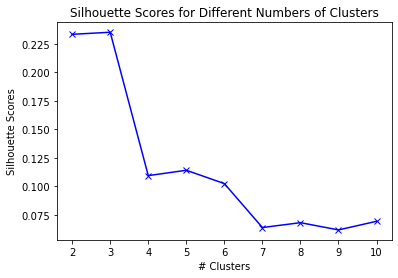

In [45]:
# List of Silhouette Scores for rbf method
s_scores_rbf = []

# Finding the optimal number of cluster for the rbf basis appraoch
for k in range(2, 11):
    
    # Building the clustering model 
    spectral_model_rbf = SpectralClustering(n_clusters = k, affinity ='rbf')

    # Training the model and Storing the predicted cluster labels
    labels_rbf = spectral_model_rbf.fit_predict(X_principal)
    
    # Evaluating the performance 
    s_scores_rbf.append(silhouette_score(df_clustering, labels_rbf))

print(s_scores_rbf)

plt.plot(range(2,11), s_scores_rbf, 'bx-')
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

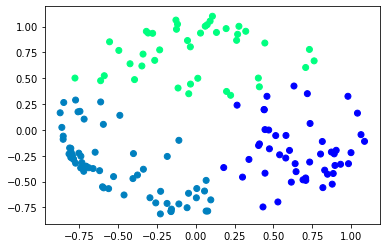

In [38]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 3, affinity ='rbf').fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

In [24]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal)

[-0.004017433335337869, -0.004017433335337869, -0.004017433335337869, -0.0056315831254729895, -0.004017433335337869, -0.004017433335337869, -0.004017433335337869, -0.004821087840386851, -0.004017433335337869]


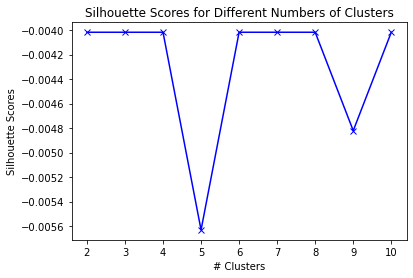

In [42]:
# List of Silhouette Scores for nn method
s_scores_nn= []

# Finding the optimal number of cluster for the rbf basis appraoch
for k in range(2, 11):
    
    # Building the clustering model 
    spectral_model_nn = SpectralClustering(n_clusters = k, affinity ='nearest_neighbors')

    # Training the model and Storing the predicted cluster labels
    labels_nn = spectral_model_rbf.fit_predict(X_principal)
    
    # Evaluating the performance
    s_scores_nn.append(silhouette_score(df_clustering, labels_nn))

print(s_scores_nn)

plt.plot(range(2,11), s_scores_nn, 'bx-')
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

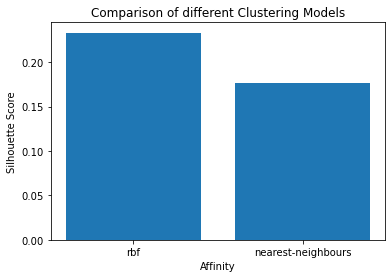

[0.23319514771763758, 0.176649994299294]


In [27]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(df_clustering, labels_rbf)) 
s_scores.append(silhouette_score(df_clustering, labels_nn)) 

# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models')
plt.show()

print(s_scores)